- Nama: Mohamad Arif Sofyan
- PBI : ID/X Parnets

# Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv")
df.head()

<ipython-input-2-0fd411f67277>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
# Mengatur opsi tampilan Pandas
pd.set_option('display.max_rows', None)  # Memastikan semua baris dapat ditampilkan
pd.set_option('display.max_columns', None)  # Memastikan semua kolom dapat ditampilkan
pd.set_option('display.width', 1000)  # Mengatur lebar tampilan agar cukup untuk menampilkan semua data

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
print("Jumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())

Jumlah Nilai yang Hilang per Kolom:
Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti           

# Pemilihan feature

# Keterangan untuk Kolom yang Dihapus:

**Kolom Redundan atau Tidak Relevan:**
- 'Unnamed: 0': **hanya indeks tambahan**.
- 'id', 'member_id', 'application_type': **ID unik yang tidak mempengaruhi analisis.**
- 'url': **URL dari pinjaman, tidak relevan untuk analisis.**
- 'desc': **Deskripsi teks bebas, sulit diinterpretasikan untuk model.**
- 'policy_code': **Jika semua nilai sama, tidak memberikan informasi.**
- 'title' : **Terlalu banyak informasi dan sebagai gantinya ada kolom purpose**

**Kolom dengan Banyak Data yang Hilang:**
- 'annual_inc_joint', 'dti_joint', 'verification_status_joint': **Mayoritas data tidak tersedia.**
- 'open_acc_6m', 'open_il_6m', dll.: **Jumlah data yang hilang signifikan.**
- 'mths_since_rcnt_il', 'total_bal_il', dll.: **Informasi kurang lengkap mengenai kredit.**
- 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'next_pymnt_d': **Tingkat kekosongan data sangat tinggi.**

**Kolom Terlalu Spesifik:**
- 'zip_code', 'addr_state': **Informasi geografis yang terlalu spesifik dan kurang relevan untuk analisis umum.**

In [6]:
columns_to_drop = [
    'Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'policy_code',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
    'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
    'inq_last_12m', 'mths_since_last_delinq', 'mths_since_last_record',
    'mths_since_last_major_derog', 'next_pymnt_d', 'zip_code', 'addr_state','application_type','title'
]

df = df.drop(columns=columns_to_drop)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

# CLEANING, PREPROCESSING, FEATURE ENGINEERING
Pada tahap ini, dilakukan penghapusan atau modifikasi beberapa fitur agar dapat disusun dalam format yang cocok untuk proses pemodelan.

# emp_length
Memodifikasi `emp_length`. Contoh: 8 years -> 8

In [8]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '', regex=True)
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0), regex=True)
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '', regex=True)
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '', regex=True)

In [10]:
# Ubah tipe data kolom emp_length_int menjadi float
df['emp_length_int'] = df['emp_length_int'].astype(float)

In [11]:
# Hapus kolom emp_length yang sudah tidak diperlukan
df.drop('emp_length', axis=1, inplace=True)
df['emp_length_int'].head()

0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_length_int, dtype: float64

# term
Memodifikasi `term`. Contoh: 60 months -> 60

In [12]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
df['term_int'] = df['term'].str.replace(' months', '').astype(int)

In [14]:
df.drop('term', axis=1, inplace=True)

# earliest_cr_line
Mengubah format `earliest_cr_line` dari bulan-tahun menjadi perhitungan jumlah waktu yang telah berlalu sejak saat itu. Untuk melakukan ini, biasanya digunakan tanggal referensi = hari ini. Tetapi, karena dataset ini berkisar antara tahun 2007-2014, lebih relevan untuk menggunakan tanggal referensi sekitar tahun 2017. Dalam kasus ini, tanggal 2017-12-01 digunakan sebagai tanggal referensi.

In [15]:
df.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [16]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [17]:
import numpy as np

df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [18]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [19]:
latest_year = df['earliest_cr_line_date'].dt.year.max()

print("Tahun terbaru dalam kolom 'earliest_cr_line' adalah:", latest_year)

Tahun terbaru dalam kolom 'earliest_cr_line' adalah: 2068.0


Nilai negatif muncul karena fungsi Python salah menafsirkan tahun 68 sebagai tahun 2068, padahal seharusnya 68 merujuk pada tahun 1968.

In [20]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Untuk menyelesaikan masalah ini, kita bisa melakukan preprocessing lebih lanjut untuk memperbaiki tahun 2068 menjadi 1968. Namun, pada kali ini, saya hanya akan mengubah nilai yang negatif menjadi nilai maksimum dari fitur tersebut. Dalam kasus ini, karena nilai negatif menunjukkan data yang sangat lama (tahun 1900-an), masih masuk akal jika saya menggantinya dengan nilai maksimum.

In [21]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [22]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

# issue_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [23]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [24]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [25]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

# last_pymnt_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [26]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [27]:
df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [28]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [29]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [30]:
df['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [31]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# **DEFINE TARGET VARIABLE / LABELING**

Menentukan target variabel good loan atau bad loan dari informasi kolom **loan_status**

Dalam proyek pemodelan risiko kredit, tujuan utamanya adalah untuk memprediksi kemampuan seseorang dalam melakukan pembayaran pinjaman atau kredit yang diberikan. Oleh karena itu, variabel target yang dipilih harus mencerminkan kemampuan individu

variabel `loan_status` cocok digunakan sebagai variabel target karena mencerminkan seberapa baik individu tersebut dalam melakukan pembayaran terhadap pinjaman atau kredit mereka selama ini.

In [32]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

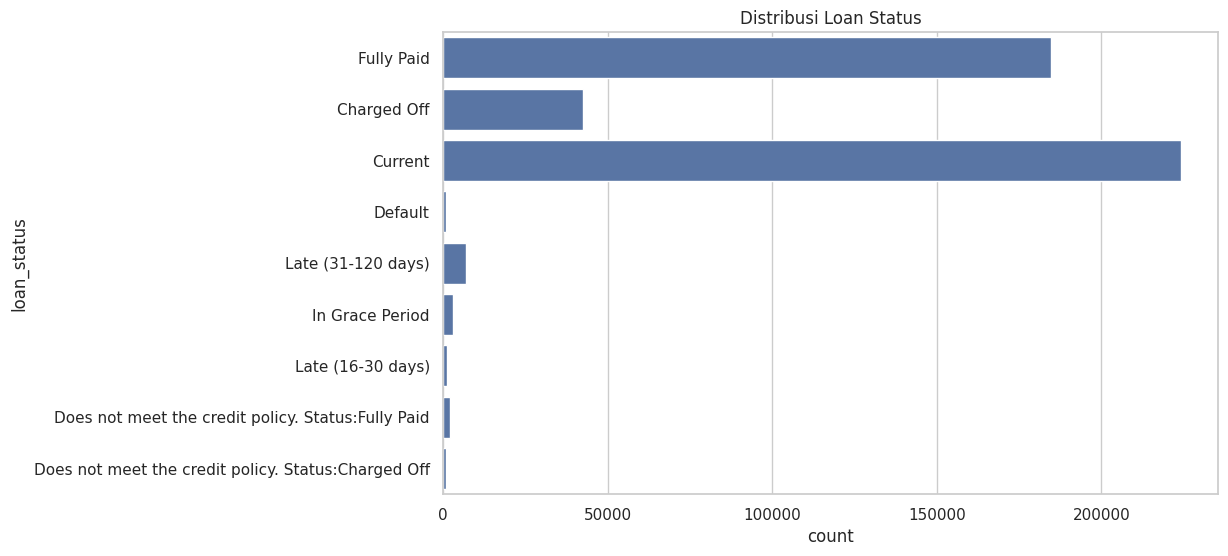

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', data=df)
plt.title('Distribusi Loan Status')
plt.show()

- **Current**: Pinjaman yang sedang aktif dan pembayarannya dilakukan tepat waktu.

- **Fully Paid**: Pinjaman ini telah dilunasi sepenuhnya, tanpa keterlambatan pembayaran.

- **Charged Off**: Pinjaman ini telah dianggap sebagai kerugian oleh pemberi pinjaman, biasanya setelah periode keterlambatan pembayaran yang signifikan.

- **Late (31-120 days)**: Pinjaman ini terlambat dibayar antara 31 hingga 120 hari.

- **In Grace Period**: Pinjaman ini dalam periode tenggang, yaitu periode waktu singkat setelah jatuh tempo pembayaran di mana peminjam masih dapat melakukan pembayaran tanpa dikenakan denda.

- **Does not meet the credit policy. Status: Fully Paid**: Pinjaman ini telah dilunasi sepenuhnya tetapi tidak memenuhi kebijakan kredit yang ditetapkan setelah pinjaman diberikan.

- **Late (16-30 days)**: Pinjaman ini terlambat dibayar antara 16 hingga 30 hari.

- **Default**: Pembayaran macet, biasanya ini berarti pembayaran telah terlambat lebih dari 120 hari.

- **Does not meet the credit policy. Status: Charged Off**: Pinjaman ini telah dianggap sebagai kerugian dan tidak memenuhi kebijakan kredit yang ditetapkan setelah pinjaman diberikan.

Membuat feature target untuk mengklasifikasikan status pinjaman menjadi Good Loan atau Bad Loan. Good Loan dikategorikan sebagai 1 dan Bad Loan sebagai 0.

In [34]:
def classify_loan(status):

    # Mendefinisikan status pinjaman yang dikategorikan sebagai Bad Loan
    bad_loan_statuses = [
        'Charged Off',
        'Default',
        'Does not meet the credit policy. Status:Charged Off',
        'Late (31-120 days)',
        'Late (16-30 days)'
    ]

    # Mengembalikan 0 jika status termasuk dalam bad_loan_statuses, selain itu 1
    return 0 if status in bad_loan_statuses else 1

# Menerapkan fungsi classify_loan pada DataFrame untuk membuat kolom target baru
df['loan_status_target'] = df['loan_status'].apply(classify_loan)

# Menampilkan beberapa baris pertama dari DataFrame untuk memverifikasi hasil
print(df[['loan_status', 'loan_status_target']].head())

   loan_status  loan_status_target
0   Fully Paid                   1
1  Charged Off                   0
2   Fully Paid                   1
3   Fully Paid                   1
4      Current                   1


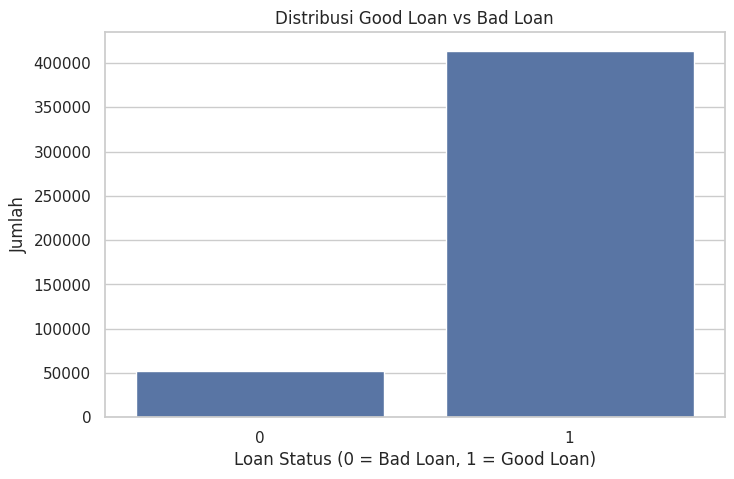

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status_target', data=df)
plt.title('Distribusi Good Loan vs Bad Loan')
plt.xlabel('Loan Status (0 = Bad Loan, 1 = Good Loan)')
plt.ylabel('Jumlah')
plt.show()

dapat dilihat bahwa jumlah bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem imbalanced dataset.

Jangan lupa untuk membuang kolom asal `loan_status`

In [36]:
df.drop('loan_status', axis=1, inplace=True)

# Exploratory Data Analysis

<Axes: >

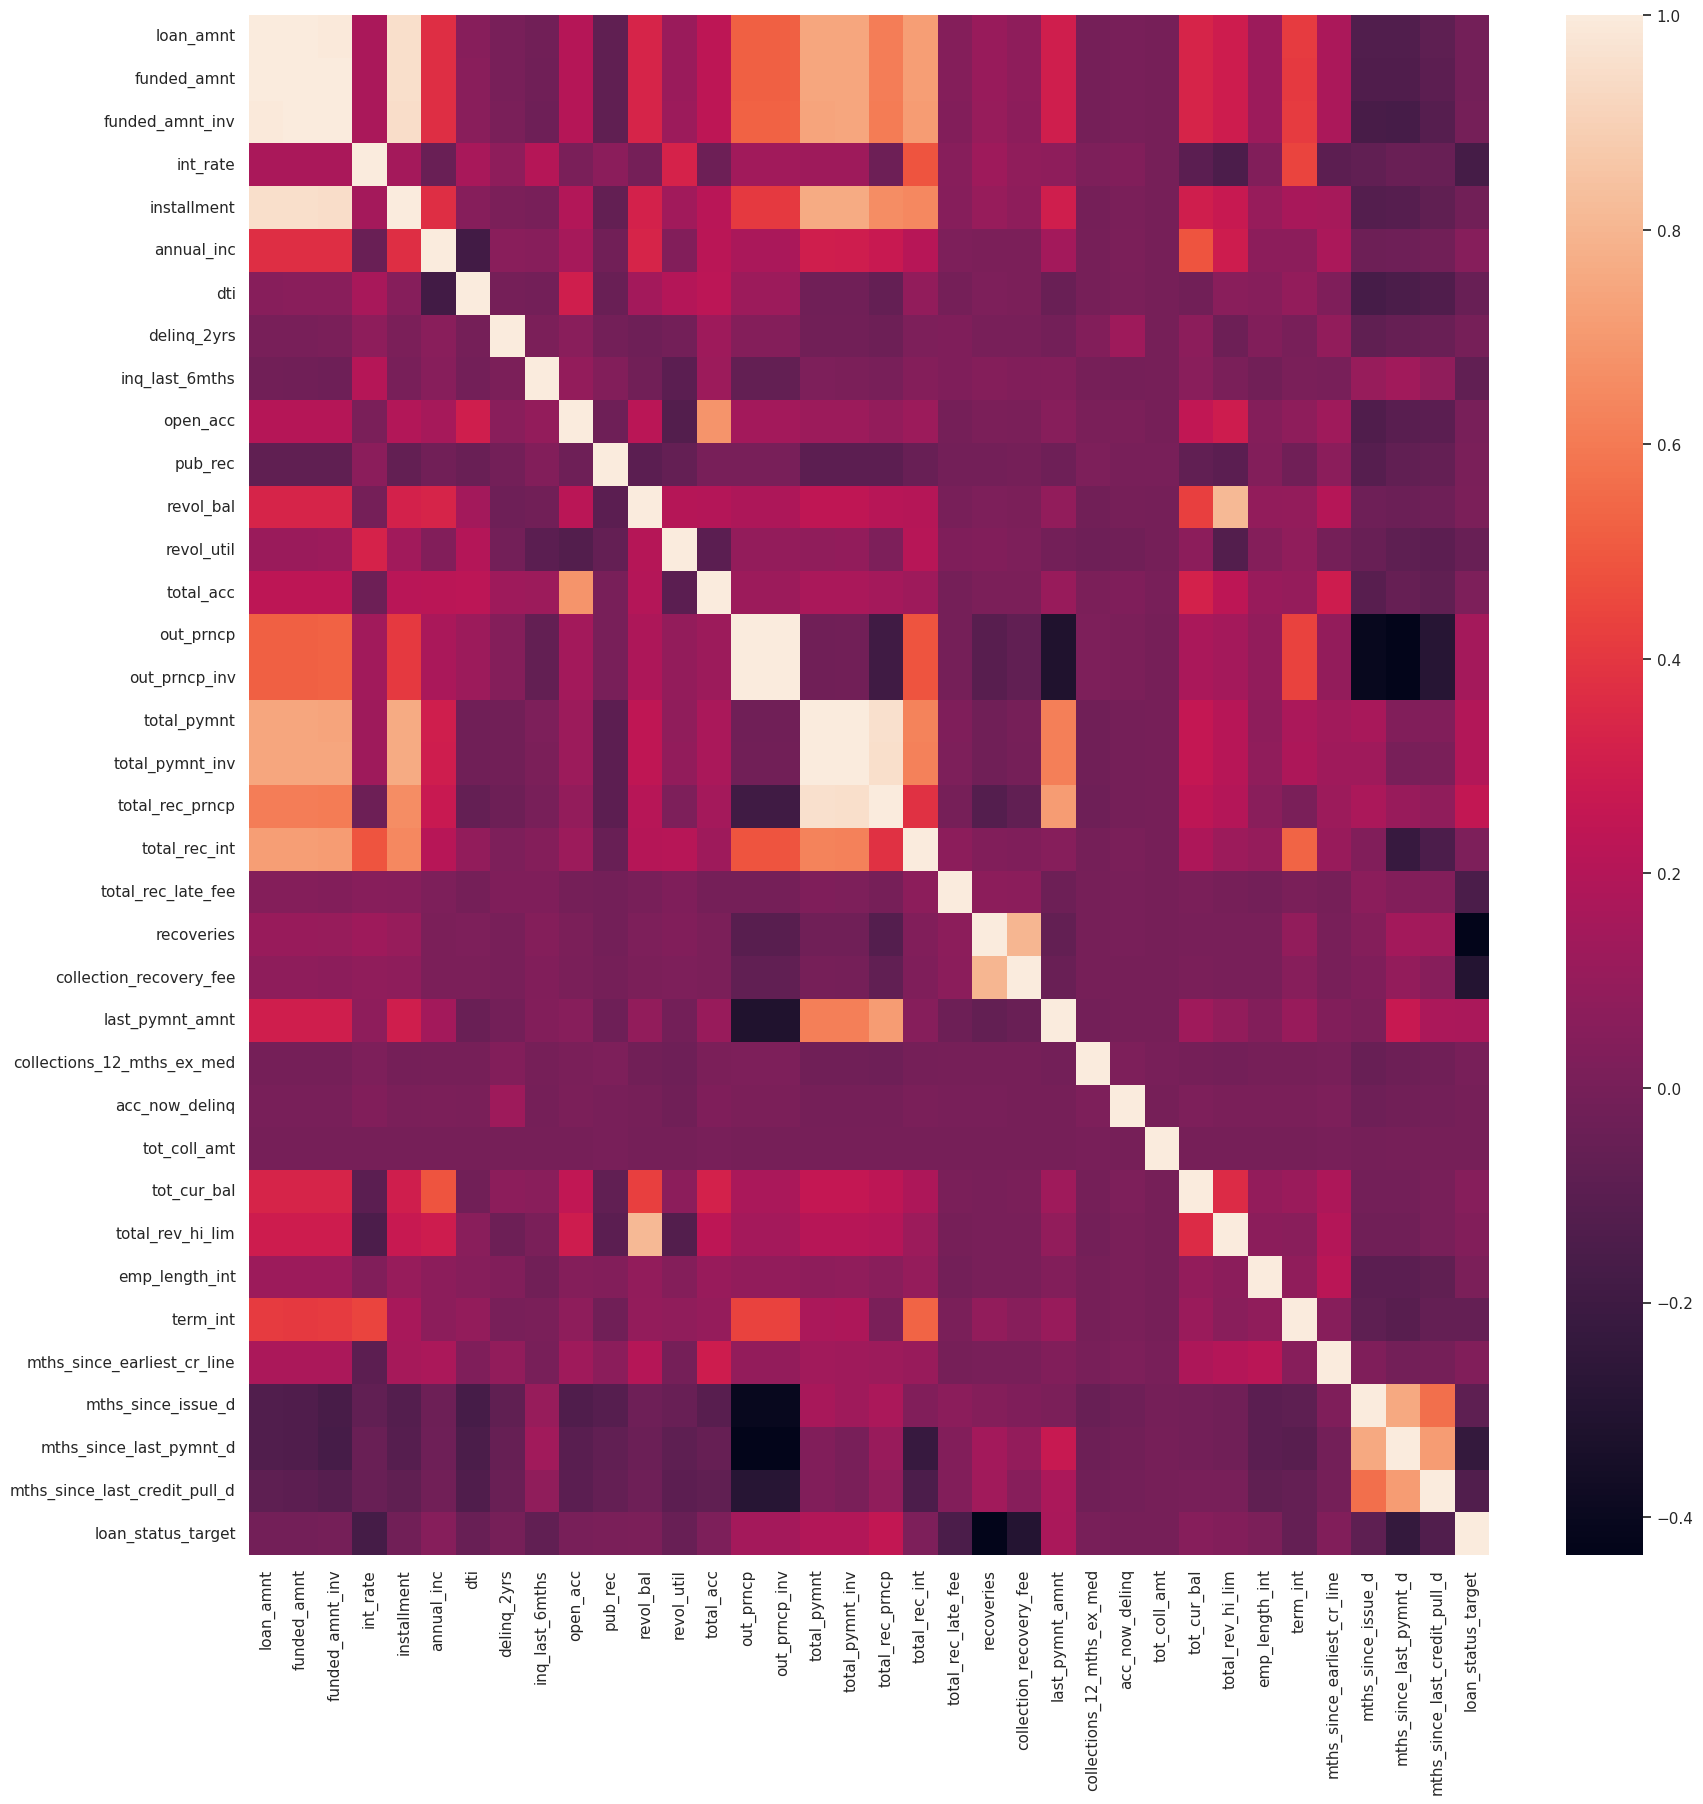

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True))

Di sini, jika terdapat pasangan fitur dengan korelasi yang tinggi, salah satunya akan dipilih. Tidak ada standar pasti untuk menentukan nilai korelasi yang dianggap tinggi, tetapi biasanya angka 0.7 digunakan sebagai acuan.

In [38]:
# Hitung matriks korelasi antar fitur numerik
corr_matrix = df.corr(numeric_only=True).abs()

# Ambil setengah bagian atas dari matriks korelasi untuk mendapatkan nilai korelasi yang unik
# Gunakan np.triu untuk menghasilkan matriks segitiga atas dengan nilai True di atas diagonal
# Dengan parameter k=1 untuk menghilangkan diagonal utama
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Temukan kolom-kolom yang memiliki korelasi lebih dari 0.7 dengan kolom lainnya
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [39]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d']

In [40]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

# Check Categorical Features

In [41]:
df.select_dtypes(include='object').nunique()

grade                       7
sub_grade                  35
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
initial_list_status         2
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality)

In [42]:
df.drop(['emp_title'], axis=1, inplace=True)

In [43]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


B3    6.795415
B4    6.542136
C1    5.780370
C2    5.734690
B2    5.706810
C3    5.429512
B5    5.415572
C4    5.169585
B1    4.906012
C5    4.756319
A5    4.666030
D1    4.130735
A4    4.084412
D2    3.655704
D3    3.198902
D4    3.023687
A3    2.695347
D5    2.480457
A2    2.349636
A1    2.260635
E1    1.937227
E2    1.859163
E3    1.496081
E4    1.285051
E5    1.090964
F1    0.844977
F2    0.643598
F3    0.580761
F4    0.443291
F5    0.324480
G1    0.237837
G2    0.176501
G3    0.125031
G4    0.090503
G5    0.082568
Name: sub_grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n   

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [44]:
df.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES
Missing Value Checking

In [45]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Proses Impute missing value setelah dataset splitting agar tidak terjadi data leakage

# Dataset Splitting

In [46]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [47]:
X = df.drop(['loan_status_target'], axis=1)
y = df['loan_status_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 28), (93257, 28), (373028,), (93257,))

# Preprocessor

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   int_rate                     466285 non-null  float64
 2   grade                        466285 non-null  object 
 3   sub_grade                    466285 non-null  object 
 4   home_ownership               466285 non-null  object 
 5   annual_inc                   466281 non-null  float64
 6   verification_status          466285 non-null  object 
 7   purpose                      466285 non-null  object 
 8   dti                          466285 non-null  float64
 9   delinq_2yrs                  466256 non-null  float64
 10  inq_last_6mths               466256 non-null  float64
 11  open_acc                     466256 non-null  float64
 12  pub_rec                      466256 non-null  float64
 13 

In [49]:
# Tentukan kolom numerik dan kategorikal
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                  'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
                  'tot_coll_amt', 'tot_cur_bal', 'emp_length_int', 'term_int', 'mths_since_earliest_cr_line',
                  'mths_since_issue_d']

categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status',
                    'purpose', 'initial_list_status']

# Buat pipeline untuk preprocessing
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numerical_cols),
    ("categoric", categorical_pipeline, categorical_cols)
])

Impute missing value untuk numerik menggunakan mean dan kategorik dengan modus. Serta dilakukan Scalling untuk data numerik menggunakan standardScaler dan dilakukan encoding untuk data kategorik menggunakan OneHotencoder

# Modeling

In [51]:
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Menambahkan parameter rf
param_space = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

# Inisialisasi pencarian acak dengan nama model
model = RandomizedSearchCV(rf_model, param_distributions=param_space, n_iter=10, cv=3, random_state=42)

In [52]:
model.fit(X_train, y_train)

# Tampilkan hasil
print("Best Parameters:", model.best_params_)
print("Training Accuracy:", model.score(X_train, y_train))
print("Model Best Score:", model.best_score_)
print("Test Accuracy:", model.score(X_test, y_test))

Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 15}
Training Accuracy: 0.9418220616146777
Model Best Score: 0.9406130367524298
Test Accuracy: 0.9408194559121568


# Evaluasi model

In [70]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64     10427
           1       0.94      1.00      0.97     82830

    accuracy                           0.94     93257
   macro avg       0.97      0.74      0.80     93257
weighted avg       0.94      0.94      0.93     93257

